In [52]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [10]:
df = pd.read_csv("accidents_2016.csv", index_col=0)

In [11]:
df.head()

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,24,Maryland,240002,1,1,0,1,1,1,1,...,99,0,None,0,None,0,None,1,0,2016-02-21 13:39:00+00:00
1,16,Idaho,160197,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,0,2016-10-28 10:02:00+00:00
2,16,Idaho,160219,1,1,0,0,0,3,3,...,99,0,None,0,None,0,None,1,0,2016-12-03 11:31:00+00:00
3,16,Idaho,160207,1,1,0,0,0,3,3,...,99,0,None,0,None,0,None,1,0,2016-11-30 14:28:00+00:00
4,32,Nevada,320145,1,1,0,0,0,1,1,...,99,0,None,0,None,0,None,1,1,2016-07-13 17:45:00+00:00


In [20]:
columns = ['state_number',
            'state_name',
            'county',
            'city',
            'day_of_crash',
            'month_of_crash',
            'year_of_crash',
            'day_of_week',
            'hour_of_crash',
            'minute_of_crash',
            'national_highway_system',
            'land_use_name',
            'route_signing_name',
            'trafficway_identifier',
            'trafficway_identifier_2',
            'milepoint',
            'latitude',
            'longitude',
            'special_jurisdiction_name',
            'manner_of_collision_name',
            'relation_to_junction_within_interchange_area',
            'relation_to_junction_specific_location_name',
            'type_of_intersection',
            'work_zone',
            'relation_to_trafficway_name',
            'number_of_fatalities',
            'number_of_drunk_drivers',
            'timestamp_of_crash'
          ]

In [21]:
df = df[columns]

In [22]:
df.head()

,state_number,state_name,county,city,day_of_crash,month_of_crash,year_of_crash,day_of_week,hour_of_crash,minute_of_crash,...,special_jurisdiction_name,manner_of_collision_name,relation_to_junction_within_interchange_area,relation_to_junction_specific_location_name,type_of_intersection,work_zone,relation_to_trafficway_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,24,Maryland,3,0,21,2,2016,1,13,39,...,No Special Jurisdiction (Includes National For...,Not Collision with Motor Vehicle in Transport ...,No,Non-Junction,Not an Intersection,None,On Roadway,1,0,2016-02-21 13:39:00+00:00
1,16,Idaho,27,0,28,10,2016,6,10,2,...,No Special Jurisdiction (Includes National For...,Not Collision with Motor Vehicle in Transport ...,No,Non-Junction,Not an Intersection,None,On Roadway,1,0,2016-10-28 10:02:00+00:00
2,16,Idaho,1,435,3,12,2016,7,11,31,...,No Special Jurisdiction (Includes National For...,Not Collision with Motor Vehicle in Transport ...,No,Non-Junction,Not an Intersection,None,On Roadside,1,0,2016-12-03 11:31:00+00:00
3,16,Idaho,27,0,30,11,2016,4,14,28,...,No Special Jurisdiction (Includes National For...,Not Collision with Motor Vehicle in Transport ...,No,Non-Junction,Not an Intersection,None,On Roadside,1,0,2016-11-30 14:28:00+00:00
4,32,Nevada,5,0,13,7,2016,4,17,45,...,No Special Jurisdiction (Includes National For...,Not Collision with Motor Vehicle in Transport ...,No,Non-Junction,Not an Intersection,None,On Roadside,1,1,2016-07-13 17:45:00+00:00


In [31]:
fatalities_by_state = pd.pivot_table(df, values='number_of_fatalities',\
                      index=['state_name'], aggfunc=np.sum)

In [34]:
fatalities_by_state.sort_values(by=['number_of_fatalities'], ascending=False, inplace=True)

In [35]:
fatalities_by_state

,number_of_fatalities
state_name,
California,3837
Texas,3797
Florida,3176
Georgia,1556
North Carolina,1450
Pennsylvania,1188
Ohio,1132
Alabama,1083
Illinois,1078


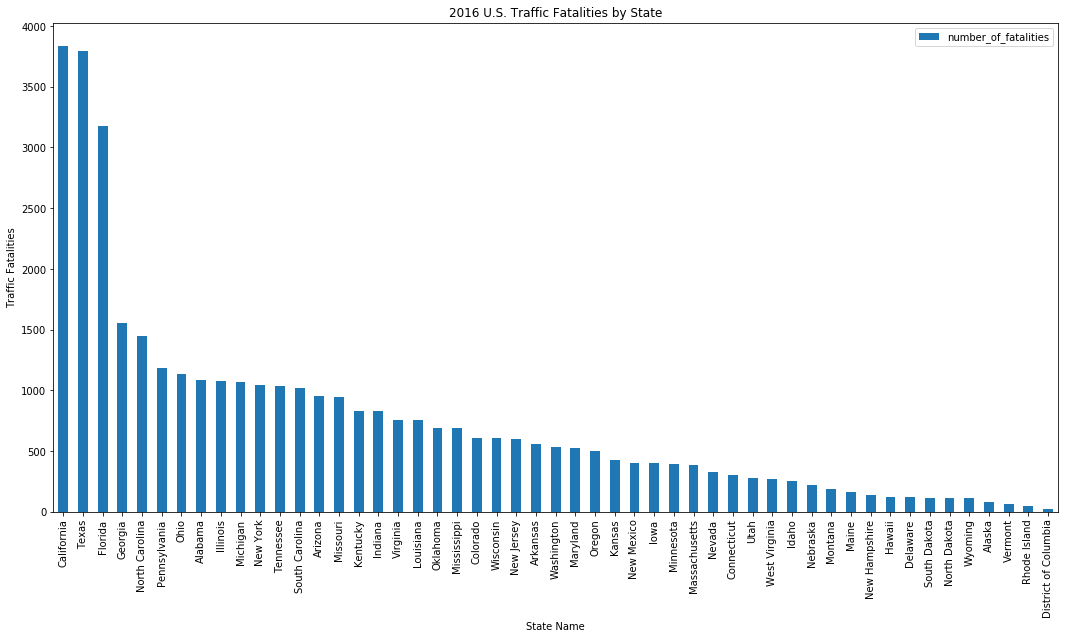

In [64]:
fatalities_by_state.plot(kind='bar')
plt.title("2016 U.S. Traffic Fatalities by State")
plt.rcParams["figure.figsize"] = [18,9]
plt.ylabel("Traffic Fatalities")
plt.xlabel("State Name")
plt.savefig("fatalities_by_state_bar_chart.png")